In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from main import Sequential, Dense, accuracy, SGD, Momentum, Adam, L2Regularizer
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mnist_data.csv")

In [3]:
X = data.drop(columns=['label'])
y = data['label']
y = pd.get_dummies(y)
X  = X/255.0
X = X.to_numpy()
y = y.to_numpy().astype(np.float32)

X, X_test, y, y_test = train_test_split(X, y, train_size=0.3)


In [4]:

model = Sequential([
    Dense(16, regularizer=L2Regularizer(0.001)),
    Dense(16, regularizer=L2Regularizer(0.001)),
    Dense(10, regularizer=L2Regularizer(0.001), activation='softmax')
])
model.compile(loss='sparse_categorical_cross_entropy', optimizer=Adam(model, learning_rate=0.001))

In [5]:
(train_loss, train_accuracy), (test_loss, test_accuracy) = model.fit(X, y, epochs=50, X_test=X_test, y_test=y_test)

Epoch: 1, time taken: 1.2385823726654053, accuracy=0.7221340947546531, sparse_categorical_cross_entropy loss=0.9508936383729637
Epoch: 2, time taken: 1.1412196159362793, accuracy=0.8945642978003384, sparse_categorical_cross_entropy loss=0.4173459009258192
Epoch: 3, time taken: 1.5052266120910645, accuracy=0.9116698392554992, sparse_categorical_cross_entropy loss=0.354172642281089
Epoch: 4, time taken: 1.5333101749420166, accuracy=0.9173804991539763, sparse_categorical_cross_entropy loss=0.3280615515862506
Epoch: 5, time taken: 1.3911759853363037, accuracy=0.9265810067681896, sparse_categorical_cross_entropy loss=0.3074289562287822
Epoch: 6, time taken: 1.1506421566009521, accuracy=0.931577834179357, sparse_categorical_cross_entropy loss=0.2956116522629328
Epoch: 7, time taken: 1.220388650894165, accuracy=0.93350782571912, sparse_categorical_cross_entropy loss=0.28377792117256967
Epoch: 8, time taken: 1.2440986633300781, accuracy=0.9378172588832487, sparse_categorical_cross_entropy loss

In [7]:
# A = model.pre
y_pred = model.predict(X_test)
y_pred.shape
y_pred
temp = np.zeros_like(y_pred)
temp[np.arange(y_pred.shape[0]),np.argmax(y_pred, axis=1)] = True
accuracy(temp, y_test)



np.float64(0.9380952380952381)

0.9380952380952381
45


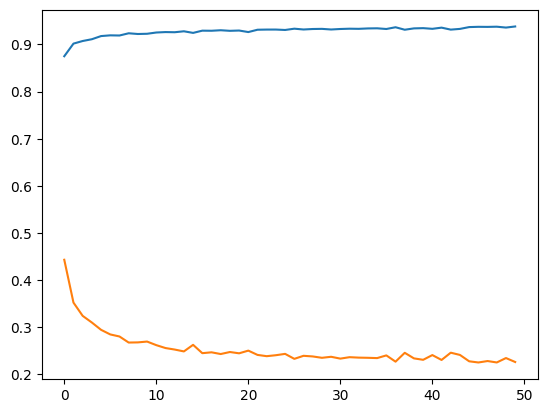

In [8]:
print(np.max(test_accuracy))
print(np.argmin(test_loss))
plt.plot(test_accuracy)
plt.plot(test_loss)

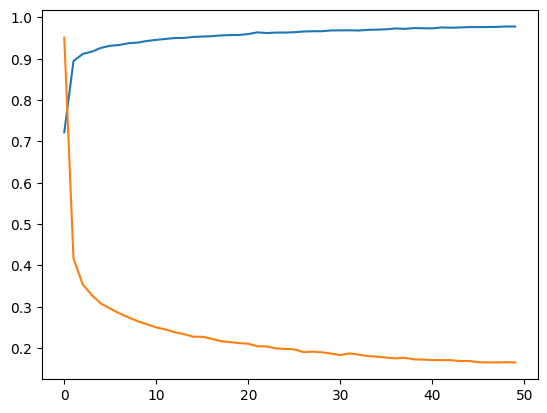

In [9]:
plt.plot(train_accuracy)
plt.plot(train_loss)

In [10]:
# import tensorflow as tf
X.shape

(12600, 784)

In [11]:
# tfmodel = tf.keras.Sequential([
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# tfmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy, metrics=['accuracy'])

In [12]:
# tfmodel.fit(X, y, epochs=10)